In [1]:
import numpy as np
import cvxpy as cp

In [2]:
# X_data = np.array([
#     [1, 1, np.sqrt(2)],
#     [1, 1, -np.sqrt(2)],
#     [1, 1, np.sqrt(2)],
#     [1, 1, -np.sqrt(2)],
#     [4, 4, 4 * np.sqrt(2)],
#     [4, 4, -4 * np.sqrt(2)],
#     [4, 4, 4 * np.sqrt(2)],
#     [4, 4, -4 * np.sqrt(2)],
# ])
X_data = np.array([
    [1, 1, 2],
    [1, -1, 2],
    [-1, 1, 2],
    [-1, -1, 2],
    [2, 2, 8],
    [2, -2, 8],
    [-2, 2, 8],
    [-2, -2, 8],
])
    
y = np.array([1, 1, 1, 1, -1, -1, -1, -1])

In [7]:
# use svm classifier to classify the data
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_data, y)
print("Support vectors: \n", clf.support_vectors_)
print("Dual coefficients: \n", clf.dual_coef_)
print("Bias term: \n", clf.intercept_)

Support vectors: 
 [[ 2.  2.  8.]
 [-2. -2.  8.]
 [-1. -1.  2.]]
Dual coefficients: 
 [[-0.01388686 -0.04166059  0.05554746]]
Bias term: 
 [1.66637508]


In [3]:
# use cvxpy to solve the problem
w = cp.Variable(3)
b = cp.Variable()
objective = cp.Minimize(1/2 * cp.norm(w, 2)**2)
constraints = [y[i] * (w.T @ X_data[i] + b) >= 1 for i in range(8)]
problem = cp.Problem(objective, constraints)
problem.solve()
w_opt = w.value
b_opt = b.value
print("w_opt: ", w_opt)
print("b_opt: ", b_opt)

w_opt:  [ 2.20580107e-17 -1.69968435e-17 -3.33333334e-01]
b_opt:  1.6666666679576894


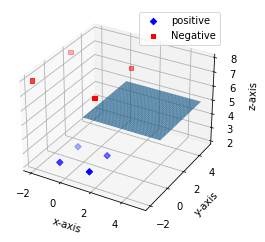

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the data points
# ax.set_zlim3d(-1, 1)
# ax.set_zlim3d(-6, 6)
z_min = np.min(X_data[:, 2])
z_max = np.max(X_data[:, 2])
ax.set_zlim(z_min - 0.1, z_max + 0.1)
ax.scatter(X_data[:4, 0], X_data[:4, 1], X_data[:4, 2], c='b', marker='D', label='positive')
ax.scatter(X_data[4:, 0], X_data[4:, 1], X_data[4:, 2], c='r', marker='s', label='Negative')

# plot the optimal hyperplane
xx, yy = np.meshgrid(np.linspace(0, 5, 100), np.linspace(0, 5, 100))
zz = (-w_opt[0] * xx - w_opt[1] * yy - b_opt) / w_opt[2]
ax.plot_surface(xx, yy, zz, alpha=0.8)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.legend()
plt.show()